# Exploring housing cost of New York Metropolitan Region

## Data Source
Our group project focuses on the migration trend from city core to suburbs in the New York Metropolitan Region. We are hoping to capture the migration impact with the value of owner occupied houisng units in the region. For this assignment, I aimed at finding census data with geojson format that includes housing values of owner occupied units. After some dig, I was able to find the desired census data with geojson format from [Census Reporter](https://censusreporter.org/). 

After I uploaded the data, I imported libraries to help me analyze the data. 

In [1]:
# for general data wrangling tasks
import pandas as pd

# to read and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt


I finished importing 4 libraries into the notebook to help me analyze the data. 

### Import data

I used geojson data to explore spatial data.

In [2]:
gdf = gpd.read_file('acs2019_5yr_B25075_05000US36079.geojson')

Using the path reference that I uploaded the file, I load and read the data file I downloaded from Census Reporter.

### Data Inspections

Before I start to explore the data and use it to analyze the housing costs in New York Metro Region, I need to know what's in the dataset to dertermine what to keep and discard.  

In [3]:
gdf.shape

(42, 57)

There are 42 rows and 57 columns in the dataset. 

I use the head command to look at the fist 5 rows of the data. 

In [4]:
gdf.head()

,geoid,name,B25075001,"B25075001, Error",B25075002,"B25075002, Error",B25075003,"B25075003, Error",B25075004,"B25075004, Error",...,"B25075023, Error",B25075024,"B25075024, Error",B25075025,"B25075025, Error",B25075026,"B25075026, Error",B25075027,"B25075027, Error",geometry
0,05000US09001,"Fairfield County, CT",228111.0,1977.0,1128.0,194.0,190.0,63.0,281.0,98.0,...,1074.0,19789.0,859.0,15282.0,647.0,6969.0,456.0,12019.0,522.0,"MULTIPOLYGON (((-73.54362 41.37509, -73.54347 ..."
1,05000US09005,"Litchfield County, CT",56714.0,931.0,177.0,73.0,165.0,80.0,154.0,76.0,...,330.0,1232.0,174.0,621.0,117.0,368.0,95.0,683.0,146.0,"MULTIPOLYGON (((-73.50793 41.79152, -73.50787 ..."
2,05000US09007,"Middlesex County, CT",49235.0,714.0,151.0,63.0,68.0,48.0,91.0,52.0,...,423.0,1093.0,244.0,403.0,123.0,246.0,120.0,97.0,52.0,"MULTIPOLYGON (((-72.65367 41.43812, -72.65419 ..."
3,05000US09009,"New Haven County, CT",204451.0,2096.0,851.0,183.0,330.0,126.0,572.0,144.0,...,618.0,3440.0,354.0,1243.0,234.0,403.0,91.0,786.0,148.0,"MULTIPOLYGON (((-73.14755 41.36770, -73.14852 ..."
4,05000US09011,"New London County, CT",71566.0,1085.0,579.0,189.0,329.0,158.0,406.0,122.0,...,327.0,1184.0,163.0,574.0,125.0,170.0,61.0,320.0,108.0,"MULTIPOLYGON (((-72.32451 41.61857, -72.32467 ..."


I found out there are some columns that I do not want to include in my analysis (error columns), so I will get rid of those later in the data exploration. But now let's plot our data on the map. 

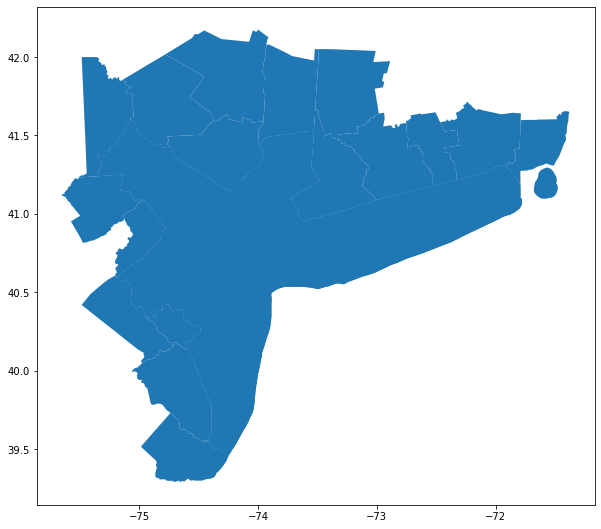

In [5]:
gdf.plot(figsize=(10,10))

Here is the map that shows the geographic area of analysis.

### Data Types

Using info command, we can see the data types included in this dataset. 

In [6]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 57 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             42 non-null     object  
 1   name              42 non-null     object  
 2   B25075001         42 non-null     float64 
 3   B25075001, Error  42 non-null     float64 
 4   B25075002         42 non-null     float64 
 5   B25075002, Error  42 non-null     float64 
 6   B25075003         42 non-null     float64 
 7   B25075003, Error  42 non-null     float64 
 8   B25075004         42 non-null     float64 
 9   B25075004, Error  42 non-null     float64 
 10  B25075005         42 non-null     float64 
 11  B25075005, Error  42 non-null     float64 
 12  B25075006         42 non-null     float64 
 13  B25075006, Error  42 non-null     float64 
 14  B25075007         42 non-null     float64 
 15  B25075007, Error  42 non-null     float64 
 16  B25075008         42

I will use display.max command to override the default and show all the columns in this dataset.

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [8]:
gdf.sample()

,geoid,name,B25075001,"B25075001, Error",B25075002,"B25075002, Error",B25075003,"B25075003, Error",B25075004,"B25075004, Error",B25075005,"B25075005, Error",B25075006,"B25075006, Error",B25075007,"B25075007, Error",B25075008,"B25075008, Error",B25075009,"B25075009, Error",B25075010,"B25075010, Error",B25075011,"B25075011, Error",B25075012,"B25075012, Error",B25075013,"B25075013, Error",B25075014,"B25075014, Error",B25075015,"B25075015, Error",B25075016,"B25075016, Error",B25075017,"B25075017, Error",B25075018,"B25075018, Error",B25075019,"B25075019, Error",B25075020,"B25075020, Error",B25075021,"B25075021, Error",B25075022,"B25075022, Error",B25075023,"B25075023, Error",B25075024,"B25075024, Error",B25075025,"B25075025, Error",B25075026,"B25075026, Error",B25075027,"B25075027, Error",geometry
21,05000US36005,"Bronx County, NY",99212.0,2030.0,1465.0,248.0,1031.0,288.0,2565.0,701.0,1905.0,439.0,1317.0,361.0,1487.0,487.0,856.0,430.0,986.0,216.0,733.0,179.0,498.0,159.0,418.0,112.0,768.0,190.0,677.0,176.0,2287.0,360.0,1750.0,300.0,3048.0,315.0,2163.0,300.0,4464.0,476.0,4492.0,519.0,15731.0,749.0,20633.0,967.0,24215.0,934.0,3567.0,380.0,1106.0,248.0,284.0,90.0,766.0,175.0,"MULTIPOLYGON (((-73.93365 40.88246, -73.93173 ..."


Here you can see all the columns included in this dataset.

I want to make sure that there is not a row that includes the total amount of owner-occupied housing units in the region. So I checked with the head command and the tail command.

In [9]:
gdf.head()

,geoid,name,B25075001,"B25075001, Error",B25075002,"B25075002, Error",B25075003,"B25075003, Error",B25075004,"B25075004, Error",B25075005,"B25075005, Error",B25075006,"B25075006, Error",B25075007,"B25075007, Error",B25075008,"B25075008, Error",B25075009,"B25075009, Error",B25075010,"B25075010, Error",B25075011,"B25075011, Error",B25075012,"B25075012, Error",B25075013,"B25075013, Error",B25075014,"B25075014, Error",B25075015,"B25075015, Error",B25075016,"B25075016, Error",B25075017,"B25075017, Error",B25075018,"B25075018, Error",B25075019,"B25075019, Error",B25075020,"B25075020, Error",B25075021,"B25075021, Error",B25075022,"B25075022, Error",B25075023,"B25075023, Error",B25075024,"B25075024, Error",B25075025,"B25075025, Error",B25075026,"B25075026, Error",B25075027,"B25075027, Error",geometry
0,05000US09001,"Fairfield County, CT",228111.0,1977.0,1128.0,194.0,190.0,63.0,281.0,98.0,455.0,140.0,423.0,149.0,525.0,144.0,211.0,76.0,623.0,152.0,818.0,198.0,913.0,217.0,601.0,152.0,1117.0,205.0,655.0,185.0,3556.0,406.0,3554.0,402.0,7663.0,578.0,6090.0,564.0,16575.0,758.0,18553.0,820.0,41872.0,1278.0,28906.0,1208.0,39343.0,1074.0,19789.0,859.0,15282.0,647.0,6969.0,456.0,12019.0,522.0,"MULTIPOLYGON (((-73.54362 41.37509, -73.54347 ..."
1,05000US09005,"Litchfield County, CT",56714.0,931.0,177.0,73.0,165.0,80.0,154.0,76.0,90.0,43.0,83.0,44.0,43.0,30.0,60.0,66.0,148.0,63.0,189.0,60.0,301.0,115.0,339.0,102.0,602.0,131.0,743.0,134.0,2888.0,329.0,4080.0,402.0,5274.0,512.0,3938.0,396.0,8940.0,516.0,7465.0,565.0,10056.0,541.0,4214.0,360.0,3861.0,330.0,1232.0,174.0,621.0,117.0,368.0,95.0,683.0,146.0,"MULTIPOLYGON (((-73.50793 41.79152, -73.50787 ..."
2,05000US09007,"Middlesex County, CT",49235.0,714.0,151.0,63.0,68.0,48.0,91.0,52.0,182.0,97.0,113.0,53.0,117.0,57.0,43.0,40.0,128.0,65.0,136.0,77.0,128.0,61.0,211.0,125.0,103.0,57.0,427.0,158.0,1053.0,238.0,1627.0,296.0,2613.0,324.0,3239.0,345.0,8287.0,626.0,8012.0,553.0,11947.0,621.0,5117.0,465.0,3603.0,423.0,1093.0,244.0,403.0,123.0,246.0,120.0,97.0,52.0,"MULTIPOLYGON (((-72.65367 41.43812, -72.65419 ..."
3,05000US09009,"New Haven County, CT",204451.0,2096.0,851.0,183.0,330.0,126.0,572.0,144.0,393.0,133.0,503.0,187.0,343.0,132.0,471.0,140.0,704.0,142.0,1073.0,207.0,1360.0,215.0,2210.0,320.0,2560.0,297.0,2851.0,316.0,10198.0,756.0,11415.0,767.0,18786.0,1049.0,15950.0,888.0,32577.0,1249.0,28404.0,1072.0,36512.0,1097.0,18322.0,953.0,12194.0,618.0,3440.0,354.0,1243.0,234.0,403.0,91.0,786.0,148.0,"MULTIPOLYGON (((-73.14755 41.36770, -73.14852 ..."
4,05000US09011,"New London County, CT",71566.0,1085.0,579.0,189.0,329.0,158.0,406.0,122.0,260.0,122.0,284.0,123.0,334.0,132.0,193.0,106.0,217.0,118.0,294.0,120.0,403.0,133.0,530.0,175.0,390.0,101.0,559.0,174.0,3388.0,373.0,3723.0,393.0,7224.0,556.0,6442.0,477.0,12263.0,657.0,10324.0,627.0,12281.0,613.0,5226.0,345.0,3669.0,327.0,1184.0,163.0,574.0,125.0,170.0,61.0,320.0,108.0,"MULTIPOLYGON (((-72.32451 41.61857, -72.32467 ..."


In [10]:
gdf.tail()

,geoid,name,B25075001,"B25075001, Error",B25075002,"B25075002, Error",B25075003,"B25075003, Error",B25075004,"B25075004, Error",B25075005,"B25075005, Error",B25075006,"B25075006, Error",B25075007,"B25075007, Error",B25075008,"B25075008, Error",B25075009,"B25075009, Error",B25075010,"B25075010, Error",B25075011,"B25075011, Error",B25075012,"B25075012, Error",B25075013,"B25075013, Error",B25075014,"B25075014, Error",B25075015,"B25075015, Error",B25075016,"B25075016, Error",B25075017,"B25075017, Error",B25075018,"B25075018, Error",B25075019,"B25075019, Error",B25075020,"B25075020, Error",B25075021,"B25075021, Error",B25075022,"B25075022, Error",B25075023,"B25075023, Error",B25075024,"B25075024, Error",B25075025,"B25075025, Error",B25075026,"B25075026, Error",B25075027,"B25075027, Error",geometry
37,05000US42103,"Pike County, PA",18411.0,497.0,150.0,86.0,86.0,56.0,71.0,58.0,65.0,43.0,39.0,33.0,79.0,48.0,68.0,44.0,121.0,74.0,173.0,85.0,195.0,81.0,437.0,120.0,529.0,159.0,364.0,132.0,1892.0,308.0,1942.0,291.0,2365.0,286.0,1471.0,239.0,2859.0,341.0,2072.0,285.0,2194.0,267.0,502.0,117.0,515.0,177.0,62.0,28.0,88.0,82.0,18.0,17.0,54.0,36.0,"MULTIPOLYGON (((-75.31312 41.36997, -75.31086 ..."
38,05000US42127,"Wayne County, PA",15259.0,397.0,163.0,69.0,60.0,48.0,40.0,32.0,97.0,60.0,63.0,25.0,12.0,9.0,76.0,45.0,211.0,86.0,149.0,86.0,209.0,70.0,394.0,115.0,557.0,133.0,304.0,95.0,1511.0,225.0,1165.0,193.0,2307.0,292.0,1243.0,160.0,2113.0,266.0,1566.0,174.0,1668.0,193.0,587.0,121.0,494.0,117.0,85.0,36.0,117.0,42.0,13.0,12.0,55.0,49.0,"MULTIPOLYGON (((-75.45976 41.59504, -75.45980 ..."
39,05000US44009,"Washington County, RI",36318.0,696.0,152.0,78.0,56.0,44.0,37.0,36.0,168.0,99.0,38.0,33.0,56.0,38.0,23.0,25.0,121.0,103.0,66.0,47.0,34.0,37.0,53.0,42.0,49.0,38.0,111.0,70.0,484.0,155.0,314.0,113.0,884.0,217.0,1064.0,260.0,4596.0,510.0,5640.0,543.0,9805.0,596.0,5114.0,483.0,4707.0,363.0,1445.0,198.0,598.0,143.0,314.0,112.0,389.0,91.0,"MULTIPOLYGON (((-71.52243 41.60257, -71.52208 ..."
40,16000US3456550,"Passaic, NJ",4417.0,375.0,26.0,26.0,0.0,29.0,8.0,12.0,0.0,29.0,40.0,32.0,8.0,14.0,0.0,29.0,12.0,17.0,23.0,24.0,0.0,29.0,51.0,51.0,5.0,9.0,13.0,15.0,124.0,91.0,138.0,104.0,289.0,111.0,123.0,71.0,509.0,130.0,462.0,137.0,1154.0,238.0,618.0,162.0,549.0,150.0,171.0,58.0,71.0,43.0,16.0,13.0,7.0,10.0,"MULTIPOLYGON (((-74.14674 40.84897, -74.14662 ..."
41,31000US35620,"New York-Newark-Jersey City, NY-NJ-PA Metro Area",3588835.0,19950.0,22446.0,1120.0,4577.0,491.0,6512.0,890.0,6859.0,701.0,6472.0,616.0,6947.0,703.0,5910.0,620.0,10703.0,739.0,10779.0,751.0,8730.0,563.0,10170.0,806.0,10905.0,694.0,10261.0,672.0,44633.0,1376.0,40919.0,1341.0,74341.0,1914.0,64445.0,1868.0,207116.0,2917.0,267764.0,3268.0,676168.0,6121.0,584660.0,5547.0,812632.0,6453.0,338854.0,3625.0,178954.0,2539.0,66106.0,1671.0,110972.0,2499.0,"MULTIPOLYGON (((-74.88982 40.78773, -74.88971 ..."


Here, you can see the last row has the total number of owner occupied housing units in the region. I want to drop the data to assist me with further analysis. 

## Clean up the data

### Delete Total row 

Since the total row at the beginning of the dataset is not necessary for our analysis, I used the drop command to delete the total row at the beginning of the dataset, and to drop the bottom row of the dataset since it includes the total amount of owner occupied houses in New York Metropolitan region.

In [11]:
gdf=gdf.drop([41])

Use head command to check if the drop command worked. 

In [12]:
gdf.head()

,geoid,name,B25075001,"B25075001, Error",B25075002,"B25075002, Error",B25075003,"B25075003, Error",B25075004,"B25075004, Error",B25075005,"B25075005, Error",B25075006,"B25075006, Error",B25075007,"B25075007, Error",B25075008,"B25075008, Error",B25075009,"B25075009, Error",B25075010,"B25075010, Error",B25075011,"B25075011, Error",B25075012,"B25075012, Error",B25075013,"B25075013, Error",B25075014,"B25075014, Error",B25075015,"B25075015, Error",B25075016,"B25075016, Error",B25075017,"B25075017, Error",B25075018,"B25075018, Error",B25075019,"B25075019, Error",B25075020,"B25075020, Error",B25075021,"B25075021, Error",B25075022,"B25075022, Error",B25075023,"B25075023, Error",B25075024,"B25075024, Error",B25075025,"B25075025, Error",B25075026,"B25075026, Error",B25075027,"B25075027, Error",geometry
0,05000US09001,"Fairfield County, CT",228111.0,1977.0,1128.0,194.0,190.0,63.0,281.0,98.0,455.0,140.0,423.0,149.0,525.0,144.0,211.0,76.0,623.0,152.0,818.0,198.0,913.0,217.0,601.0,152.0,1117.0,205.0,655.0,185.0,3556.0,406.0,3554.0,402.0,7663.0,578.0,6090.0,564.0,16575.0,758.0,18553.0,820.0,41872.0,1278.0,28906.0,1208.0,39343.0,1074.0,19789.0,859.0,15282.0,647.0,6969.0,456.0,12019.0,522.0,"MULTIPOLYGON (((-73.54362 41.37509, -73.54347 ..."
1,05000US09005,"Litchfield County, CT",56714.0,931.0,177.0,73.0,165.0,80.0,154.0,76.0,90.0,43.0,83.0,44.0,43.0,30.0,60.0,66.0,148.0,63.0,189.0,60.0,301.0,115.0,339.0,102.0,602.0,131.0,743.0,134.0,2888.0,329.0,4080.0,402.0,5274.0,512.0,3938.0,396.0,8940.0,516.0,7465.0,565.0,10056.0,541.0,4214.0,360.0,3861.0,330.0,1232.0,174.0,621.0,117.0,368.0,95.0,683.0,146.0,"MULTIPOLYGON (((-73.50793 41.79152, -73.50787 ..."
2,05000US09007,"Middlesex County, CT",49235.0,714.0,151.0,63.0,68.0,48.0,91.0,52.0,182.0,97.0,113.0,53.0,117.0,57.0,43.0,40.0,128.0,65.0,136.0,77.0,128.0,61.0,211.0,125.0,103.0,57.0,427.0,158.0,1053.0,238.0,1627.0,296.0,2613.0,324.0,3239.0,345.0,8287.0,626.0,8012.0,553.0,11947.0,621.0,5117.0,465.0,3603.0,423.0,1093.0,244.0,403.0,123.0,246.0,120.0,97.0,52.0,"MULTIPOLYGON (((-72.65367 41.43812, -72.65419 ..."
3,05000US09009,"New Haven County, CT",204451.0,2096.0,851.0,183.0,330.0,126.0,572.0,144.0,393.0,133.0,503.0,187.0,343.0,132.0,471.0,140.0,704.0,142.0,1073.0,207.0,1360.0,215.0,2210.0,320.0,2560.0,297.0,2851.0,316.0,10198.0,756.0,11415.0,767.0,18786.0,1049.0,15950.0,888.0,32577.0,1249.0,28404.0,1072.0,36512.0,1097.0,18322.0,953.0,12194.0,618.0,3440.0,354.0,1243.0,234.0,403.0,91.0,786.0,148.0,"MULTIPOLYGON (((-73.14755 41.36770, -73.14852 ..."
4,05000US09011,"New London County, CT",71566.0,1085.0,579.0,189.0,329.0,158.0,406.0,122.0,260.0,122.0,284.0,123.0,334.0,132.0,193.0,106.0,217.0,118.0,294.0,120.0,403.0,133.0,530.0,175.0,390.0,101.0,559.0,174.0,3388.0,373.0,3723.0,393.0,7224.0,556.0,6442.0,477.0,12263.0,657.0,10324.0,627.0,12281.0,613.0,5226.0,345.0,3669.0,327.0,1184.0,163.0,574.0,125.0,170.0,61.0,320.0,108.0,"MULTIPOLYGON (((-72.32451 41.61857, -72.32467 ..."


In [13]:
gdf.tail()

,geoid,name,B25075001,"B25075001, Error",B25075002,"B25075002, Error",B25075003,"B25075003, Error",B25075004,"B25075004, Error",B25075005,"B25075005, Error",B25075006,"B25075006, Error",B25075007,"B25075007, Error",B25075008,"B25075008, Error",B25075009,"B25075009, Error",B25075010,"B25075010, Error",B25075011,"B25075011, Error",B25075012,"B25075012, Error",B25075013,"B25075013, Error",B25075014,"B25075014, Error",B25075015,"B25075015, Error",B25075016,"B25075016, Error",B25075017,"B25075017, Error",B25075018,"B25075018, Error",B25075019,"B25075019, Error",B25075020,"B25075020, Error",B25075021,"B25075021, Error",B25075022,"B25075022, Error",B25075023,"B25075023, Error",B25075024,"B25075024, Error",B25075025,"B25075025, Error",B25075026,"B25075026, Error",B25075027,"B25075027, Error",geometry
36,05000US42089,"Monroe County, PA",43960.0,939.0,414.0,158.0,164.0,101.0,244.0,112.0,57.0,41.0,242.0,113.0,209.0,104.0,240.0,147.0,485.0,196.0,528.0,172.0,617.0,148.0,1224.0,248.0,1387.0,265.0,1276.0,240.0,4978.0,542.0,4826.0,479.0,7077.0,513.0,3970.0,407.0,6432.0,513.0,3924.0,407.0,3519.0,449.0,992.0,225.0,798.0,184.0,106.0,55.0,195.0,121.0,6.0,11.0,50.0,55.0,"MULTIPOLYGON (((-75.59863 41.16306, -75.59834 ..."
37,05000US42103,"Pike County, PA",18411.0,497.0,150.0,86.0,86.0,56.0,71.0,58.0,65.0,43.0,39.0,33.0,79.0,48.0,68.0,44.0,121.0,74.0,173.0,85.0,195.0,81.0,437.0,120.0,529.0,159.0,364.0,132.0,1892.0,308.0,1942.0,291.0,2365.0,286.0,1471.0,239.0,2859.0,341.0,2072.0,285.0,2194.0,267.0,502.0,117.0,515.0,177.0,62.0,28.0,88.0,82.0,18.0,17.0,54.0,36.0,"MULTIPOLYGON (((-75.31312 41.36997, -75.31086 ..."
38,05000US42127,"Wayne County, PA",15259.0,397.0,163.0,69.0,60.0,48.0,40.0,32.0,97.0,60.0,63.0,25.0,12.0,9.0,76.0,45.0,211.0,86.0,149.0,86.0,209.0,70.0,394.0,115.0,557.0,133.0,304.0,95.0,1511.0,225.0,1165.0,193.0,2307.0,292.0,1243.0,160.0,2113.0,266.0,1566.0,174.0,1668.0,193.0,587.0,121.0,494.0,117.0,85.0,36.0,117.0,42.0,13.0,12.0,55.0,49.0,"MULTIPOLYGON (((-75.45976 41.59504, -75.45980 ..."
39,05000US44009,"Washington County, RI",36318.0,696.0,152.0,78.0,56.0,44.0,37.0,36.0,168.0,99.0,38.0,33.0,56.0,38.0,23.0,25.0,121.0,103.0,66.0,47.0,34.0,37.0,53.0,42.0,49.0,38.0,111.0,70.0,484.0,155.0,314.0,113.0,884.0,217.0,1064.0,260.0,4596.0,510.0,5640.0,543.0,9805.0,596.0,5114.0,483.0,4707.0,363.0,1445.0,198.0,598.0,143.0,314.0,112.0,389.0,91.0,"MULTIPOLYGON (((-71.52243 41.60257, -71.52208 ..."
40,16000US3456550,"Passaic, NJ",4417.0,375.0,26.0,26.0,0.0,29.0,8.0,12.0,0.0,29.0,40.0,32.0,8.0,14.0,0.0,29.0,12.0,17.0,23.0,24.0,0.0,29.0,51.0,51.0,5.0,9.0,13.0,15.0,124.0,91.0,138.0,104.0,289.0,111.0,123.0,71.0,509.0,130.0,462.0,137.0,1154.0,238.0,618.0,162.0,549.0,150.0,171.0,58.0,71.0,43.0,16.0,13.0,7.0,10.0,"MULTIPOLYGON (((-74.14674 40.84897, -74.14662 ..."


Yay, it worked! Now I want to get the full list of the column names to help me further clean up the data.

### Drop Columns

In [14]:
list(gdf)

['geoid',
 'name',
 'B25075001',
 'B25075001, Error',
 'B25075002',
 'B25075002, Error',
 'B25075003',
 'B25075003, Error',
 'B25075004',
 'B25075004, Error',
 'B25075005',
 'B25075005, Error',
 'B25075006',
 'B25075006, Error',
 'B25075007',
 'B25075007, Error',
 'B25075008',
 'B25075008, Error',
 'B25075009',
 'B25075009, Error',
 'B25075010',
 'B25075010, Error',
 'B25075011',
 'B25075011, Error',
 'B25075012',
 'B25075012, Error',
 'B25075013',
 'B25075013, Error',
 'B25075014',
 'B25075014, Error',
 'B25075015',
 'B25075015, Error',
 'B25075016',
 'B25075016, Error',
 'B25075017',
 'B25075017, Error',
 'B25075018',
 'B25075018, Error',
 'B25075019',
 'B25075019, Error',
 'B25075020',
 'B25075020, Error',
 'B25075021',
 'B25075021, Error',
 'B25075022',
 'B25075022, Error',
 'B25075023',
 'B25075023, Error',
 'B25075024',
 'B25075024, Error',
 'B25075025',
 'B25075025, Error',
 'B25075026',
 'B25075026, Error',
 'B25075027',
 'B25075027, Error',
 'geometry']

As you can see, there are "error" columns, which I don't need for the analysis. I will now get rid of the unwanted columns to focus my analysis on the housing values. 

In [15]:
columns_to_keep = ['geoid','name',
                  'B25075001',
                 'B25075002',
                 'B25075003',
                 'B25075004',
                 'B25075005',
                 'B25075006',
                 'B25075007',
                 'B25075008',
                 'B25075009',
                 'B25075010',
                 'B25075011',
                 'B25075012',
                 'B25075013',
                 'B25075014',
                 'B25075015',
                 'B25075016',
                 'B25075017',
                 'B25075018',
                 'B25075019',
                 'B25075020',
                 'B25075021',
                 'B25075022',
                 'B25075023',
                 'B25075024',
                 'B25075025',
                 'B25075026',
                 'B25075027',
                 'geometry']

In [16]:
gdf = gdf[columns_to_keep]

I selected the columns I'd like to keep and redefined gdf to include only the columns I want to keep.

Use head command to check if the aboce procedure worked.

In [17]:
gdf.head()

,geoid,name,B25075001,B25075002,B25075003,B25075004,B25075005,B25075006,B25075007,B25075008,B25075009,B25075010,B25075011,B25075012,B25075013,B25075014,B25075015,B25075016,B25075017,B25075018,B25075019,B25075020,B25075021,B25075022,B25075023,B25075024,B25075025,B25075026,B25075027,geometry
0,05000US09001,"Fairfield County, CT",228111.0,1128.0,190.0,281.0,455.0,423.0,525.0,211.0,623.0,818.0,913.0,601.0,1117.0,655.0,3556.0,3554.0,7663.0,6090.0,16575.0,18553.0,41872.0,28906.0,39343.0,19789.0,15282.0,6969.0,12019.0,"MULTIPOLYGON (((-73.54362 41.37509, -73.54347 ..."
1,05000US09005,"Litchfield County, CT",56714.0,177.0,165.0,154.0,90.0,83.0,43.0,60.0,148.0,189.0,301.0,339.0,602.0,743.0,2888.0,4080.0,5274.0,3938.0,8940.0,7465.0,10056.0,4214.0,3861.0,1232.0,621.0,368.0,683.0,"MULTIPOLYGON (((-73.50793 41.79152, -73.50787 ..."
2,05000US09007,"Middlesex County, CT",49235.0,151.0,68.0,91.0,182.0,113.0,117.0,43.0,128.0,136.0,128.0,211.0,103.0,427.0,1053.0,1627.0,2613.0,3239.0,8287.0,8012.0,11947.0,5117.0,3603.0,1093.0,403.0,246.0,97.0,"MULTIPOLYGON (((-72.65367 41.43812, -72.65419 ..."
3,05000US09009,"New Haven County, CT",204451.0,851.0,330.0,572.0,393.0,503.0,343.0,471.0,704.0,1073.0,1360.0,2210.0,2560.0,2851.0,10198.0,11415.0,18786.0,15950.0,32577.0,28404.0,36512.0,18322.0,12194.0,3440.0,1243.0,403.0,786.0,"MULTIPOLYGON (((-73.14755 41.36770, -73.14852 ..."
4,05000US09011,"New London County, CT",71566.0,579.0,329.0,406.0,260.0,284.0,334.0,193.0,217.0,294.0,403.0,530.0,390.0,559.0,3388.0,3723.0,7224.0,6442.0,12263.0,10324.0,12281.0,5226.0,3669.0,1184.0,574.0,170.0,320.0,"MULTIPOLYGON (((-72.32451 41.61857, -72.32467 ..."


And it worked like magic! But I have no idea what B2507500xx means, so I need to look it up on the Census Reporter website and rename those columns.  

### Rename columns 

To get the full list of columns to determine what I need to rename. 

In [18]:
list(gdf)

['geoid',
 'name',
 'B25075001',
 'B25075002',
 'B25075003',
 'B25075004',
 'B25075005',
 'B25075006',
 'B25075007',
 'B25075008',
 'B25075009',
 'B25075010',
 'B25075011',
 'B25075012',
 'B25075013',
 'B25075014',
 'B25075015',
 'B25075016',
 'B25075017',
 'B25075018',
 'B25075019',
 'B25075020',
 'B25075021',
 'B25075022',
 'B25075023',
 'B25075024',
 'B25075025',
 'B25075026',
 'B25075027',
 'geometry']

Then, I used the column command to rename the columns with the code I found on the Census Reporter website. 

In [19]:
gdf.columns = ['geoid',
 'name',
               'total',
 'Less than $10,000',
'$10,000 to $14,999',
'$15,000 to $19,999',
'$20,000 to $24,999',
'$25,000 to $29,999',
'$30,000 to $34,999',
'$35,000 to $39,999',
'$40,000 to $49,999',
'$50,000 to $59,999',
'$60,000 to $69,999',
'$70,000 to $79,999',
'$80,000 to $89,999',
'$90,000 to $99,999',
'$100,000 to $124,999',
'$125,000 to $149,999',
'$150,000 to $174,999',
'$175,000 to $199,999',
'$200,000 to $249,999',
'$250,000 to $299,999',
'$300,000 to $399,999',
'$400,000 to $499,999',
'$500,000 to $749,999',
'$750,000 to $999,999',
'$1,000,000 to $1,499,999',
'$1,500,000 to $1,999,999',
'$2,000,000 or more',
 'geometry']

You can see here that the housing price is actually categorized into buckets of prices. 

Again, use the head command to check if renaming command worked. 

##### gdf.head()

And it worked! This process is kind of tedious but Yoh's tips during class really helped speed up the process. 

## Stats and plot

### Statistics 

I want to know some statistics of the dataset. So I used the describe command to see the some statistical information about the 'total' column. 

In [29]:
gdf['Less than $10,000'].describe()

count      41.000000
mean      748.365854
std       679.265771
min        26.000000
25%       213.000000
50%       567.000000
75%      1101.000000
max      2959.000000
Name: Less than $10,000, dtype: float64

In [30]:
gdf['$10,000 to $14,999'].describe()

count      41.000000
mean      198.268293
std       213.663757
min         0.000000
25%        56.000000
50%       119.000000
75%       271.000000
max      1031.000000
Name: $10,000 to $14,999, dtype: float64

In [31]:
gdf['$15,000 to $19,999'].describe()

count      41.000000
mean      269.146341
std       417.512309
min         3.000000
25%        71.000000
50%       151.000000
75%       281.000000
max      2565.000000
Name: $15,000 to $19,999, dtype: float64

In [32]:
gdf['$20,000 to $24,999'].describe()

count      41.000000
mean      270.756098
std       319.532845
min         0.000000
25%        94.000000
50%       180.000000
75%       345.000000
max      1905.000000
Name: $20,000 to $24,999, dtype: float64

In [33]:
gdf['$25,000 to $29,999'].describe()

count      41.000000
mean      251.073171
std       255.336483
min        32.000000
25%        83.000000
50%       160.000000
75%       329.000000
max      1317.000000
Name: $25,000 to $29,999, dtype: float64

In [34]:
gdf['$30,000 to $34,999'].describe()

count      41.000000
mean      253.317073
std       284.315093
min         8.000000
25%        79.000000
50%       174.000000
75%       322.000000
max      1487.000000
Name: $30,000 to $34,999, dtype: float64

In [35]:
gdf['$35,000 to $39,999'].describe()

count     41.000000
mean     214.902439
std      196.145457
min        0.000000
25%       76.000000
50%      135.000000
75%      299.000000
max      856.000000
Name: $35,000 to $39,999, dtype: float64

In [37]:
gdf['$40,000 to $49,999'].describe()

count      41.000000
mean      402.682927
std       357.859850
min        12.000000
25%       162.000000
50%       318.000000
75%       518.000000
max      2017.000000
Name: $40,000 to $49,999, dtype: float64

In [38]:
gdf['$50,000 to $59,999'].describe()

count      41.000000
mean      437.609756
std       356.625075
min        23.000000
25%       170.000000
50%       307.000000
75%       575.000000
max      1295.000000
Name: $50,000 to $59,999, dtype: float64

In [39]:
gdf['$60,000 to $69,999'].describe()

count      41.000000
mean      440.707317
std       369.206801
min         0.000000
25%       153.000000
50%       340.000000
75%       624.000000
max      1649.000000
Name: $60,000 to $69,999, dtype: float64

In [40]:
gdf['$70,000 to $79,999'].describe()

count      41.000000
mean      540.634146
std       470.466564
min        18.000000
25%       211.000000
50%       418.000000
75%       682.000000
max      2210.000000
Name: $70,000 to $79,999, dtype: float64

In [41]:
gdf['$80,000 to $89,999'].describe()

count      41.000000
mean      595.341463
std       524.859867
min         5.000000
25%       204.000000
50%       503.000000
75%       768.000000
max      2560.000000
Name: $80,000 to $89,999, dtype: float64

In [42]:
gdf['$90,000 to $99,999'].describe()

count      41.000000
mean      598.731707
std       519.743688
min        13.000000
25%       291.000000
50%       468.000000
75%       728.000000
max      2851.000000
Name: $90,000 to $99,999, dtype: float64

In [43]:
gdf['$100,000 to $124,999'].describe()

count       41.000000
mean      2380.804878
std       1869.827107
min        124.000000
25%       1227.000000
50%       1892.000000
75%       3356.000000
max      10198.000000
Name: $100,000 to $124,999, dtype: float64

In [45]:
gdf['$125,000 to $149,999'].describe()

count       41.000000
mean      2405.878049
std       2214.207750
min        138.000000
25%       1114.000000
50%       1788.000000
75%       2890.000000
max      11415.000000
Name: $125,000 to $149,999, dtype: float64

In [46]:
gdf['$150,000 to $174,999'].describe()

count       41.000000
mean      4306.487805
std       3587.973168
min        289.000000
25%       2307.000000
50%       3114.000000
75%       5442.000000
max      18786.000000
Name: $150,000 to $174,999, dtype: float64

Here you can see there are lots of variance of the numder of onwer-occupied houses in New York Metropolitan Region. 

In [47]:
gdf['$175,000 to $199,999'].describe()

count       41.000000
mean      3781.975610
std       3240.001748
min        123.000000
25%       1549.000000
50%       3239.000000
75%       4548.000000
max      15950.000000
Name: $175,000 to $199,999, dtype: float64

In [48]:
gdf['$200,000 to $249,999'].describe()

count       41.000000
mean     10000.780488
std       7232.162935
min        509.000000
25%       4596.000000
50%       8451.000000
75%      12386.000000
max      32577.000000
Name: $200,000 to $249,999, dtype: float64

In [49]:
gdf['$250,000 to $299,999'].describe()

count       41.000000
mean     11033.121951
std       8321.891552
min        462.000000
25%       4593.000000
50%       8990.000000
75%      14032.000000
max      37507.000000
Name: $250,000 to $299,999, dtype: float64

I want to know the frequency dsitribution of owner occupied houses that are between $175,000 to $199,999 in New York Metropolitan Region. 

In [50]:
gdf['$300,000 to $399,999'].describe()

count        41.000000
mean      23130.073171
std       21021.295390
min        1154.000000
25%        9257.000000
50%       17483.000000
75%       29237.000000
max      113400.000000
Name: $300,000 to $399,999, dtype: float64

In [51]:
gdf['$400,000 to $499,999'].describe()

count       41.000000
mean     17693.658537
std      19293.497849
min        502.000000
25%       4715.000000
50%      11888.000000
75%      25385.000000
max      86227.000000
Name: $400,000 to $499,999, dtype: float64

In [53]:
gdf['$500,000 to $749,999'].describe()

count        41.000000
mean      22963.000000
std       27276.187701
min         494.000000
25%        3669.000000
50%       12194.000000
75%       31804.000000
max      106931.000000
Name: $500,000 to $749,999, dtype: float64

In [54]:
gdf['$750,000 to $999,999'].describe()

count       41.000000
mean      9370.000000
std      13860.043658
min         62.000000
25%       1068.000000
50%       3567.000000
75%      12172.000000
max      59859.000000
Name: $750,000 to $999,999, dtype: float64

In [56]:
gdf['$1,000,000 to $1,499,999'].describe()

count       41.000000
mean      4987.146341
std       8760.767388
min         36.000000
25%        387.000000
50%       1106.000000
75%       4837.000000
max      41944.000000
Name: $1,000,000 to $1,499,999, dtype: float64

In [57]:
gdf['$1,500,000 to $1,999,999'].describe()

count       41.000000
mean      1866.560976
std       3694.376585
min          6.000000
25%        141.000000
50%        368.000000
75%       1581.000000
max      15921.000000
Name: $1,500,000 to $1,999,999, dtype: float64

In [58]:
gdf['$2,000,000 or more'].describe()

count       41.000000
mean      3143.804878
std       8194.045055
min          7.000000
25%        247.000000
50%        674.000000
75%       1379.000000
max      47556.000000
Name: $2,000,000 or more, dtype: float64

You can see from the above analysis, that the the houses with value between $300,000 to $399,999 have the highest mean within all the owner-occupied housing units. 

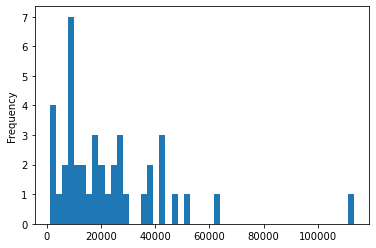

In [59]:
gdf['$300,000 to $399,999'].plot.hist(bins=50)

From the above histogram, you can see there are a lot of counties that have less than 8,000 owner occupied houses in the price range of $175,000 to $199,999, and there is 1 county that has near 16,000 owner-occupied housing fall into this price range, and this county is the outlier of this price range.

### Normalize data

Although the data above is great at telling me the number of housing units in each price category, I want to convert the number into percentage. 

In [87]:
list(gdf)

['geoid',
 'name',
 'total',
 'Less than $10,000',
 '$10,000 to $14,999',
 '$15,000 to $19,999',
 '$20,000 to $24,999',
 '$25,000 to $29,999',
 '$30,000 to $34,999',
 '$35,000 to $39,999',
 '$40,000 to $49,999',
 '$50,000 to $59,999',
 '$60,000 to $69,999',
 '$70,000 to $79,999',
 '$80,000 to $89,999',
 '$90,000 to $99,999',
 '$100,000 to $124,999',
 '$125,000 to $149,999',
 '$150,000 to $174,999',
 '$175,000 to $199,999',
 '$200,000 to $249,999',
 '$250,000 to $299,999',
 '$300,000 to $399,999',
 '$400,000 to $499,999',
 '$500,000 to $749,999',
 '$750,000 to $999,999',
 '$1,000,000 to $1,499,999',
 '$1,500,000 to $1,999,999',
 '$2,000,000 or more',
 'geometry']

In [100]:
# create a new column, and populate it with normalized data to get the percent of total value
gdf['Percent Less than $10,000'] = gdf['Less than $10,000']/gdf['total']*100
gdf['Percent $10,000 to $14,999']= gdf ['$10,000 to $14,999']/gdf['total']*100
gdf['Percent $15,000 to $19,999']= gdf ['$15,000 to $19,999']/gdf['total']*100
gdf['Percent $20,000 to $24,999']= gdf ['$15,000 to $19,999']/gdf['total']*100
gdf['Percent $25,000 to $29,999']= gdf ['$25,000 to $29,999']/gdf['total']*100
gdf['Percent $30,000 to $34,999']= gdf ['$30,000 to $34,999']/gdf['total']*100
gdf['Percent $35,000 to $39,999']= gdf ['$35,000 to $39,999']/gdf['total']*100
gdf['Percent $40,000 to $49,999']= gdf ['$40,000 to $49,999']/gdf['total']*100
gdf['Percent $50,000 to $59,999']= gdf ['$50,000 to $59,999']/gdf['total']*100
gdf['Percent $60,000 to $69,999']= gdf ['$60,000 to $69,999']/gdf['total']*100
gdf['Percent $70,000 to $79,999']= gdf ['$70,000 to $79,999']/gdf['total']*100
gdf['Percent $80,000 to $89,999']= gdf ['$80,000 to $89,999']/gdf['total']*100
gdf['Percent $90,000 to $99,999']= gdf ['$90,000 to $99,999']/gdf['total']*100
gdf['Percent $100,000 to $124,999']= gdf ['$100,000 to $124,999']/gdf['total']*100
gdf['Percent $125,000 to $149,999']= gdf ['$125,000 to $149,999']/gdf['total']*100
gdf['Percent $150,000 to $174,999']= gdf ['$150,000 to $174,999']/gdf['total']*100
gdf['Percent $175,000 to $199,999']= gdf ['$175,000 to $199,999']/gdf['total']*100
gdf['Percent $200,000 to $249,999']= gdf ['$200,000 to $249,999']/gdf['total']*100
gdf['Percent $250,000 to $299,999']= gdf ['$250,000 to $299,999']/gdf['total']*100
gdf['Percent $300,000 to $399,999']= gdf ['$300,000 to $399,999']/gdf['total']*100
gdf['Percent $400,000 to $499,999']= gdf ['$400,000 to $499,999']/gdf['total']*100
gdf['Percent $500,000 to $749,999']= gdf ['$500,000 to $749,999']/gdf['total']*100
gdf['Percent $750,000 to $999,999']= gdf ['$750,000 to $999,999']/gdf['total']*100
gdf['Percent $1,000,000 to $1,499,999']= gdf ['$1,000,000 to $1,499,999']/gdf['total']*100
gdf['Percent $1,500,000 to $1,999,999']= gdf ['$175,000 to $199,999']/gdf['total']*100
gdf['Percent $2,000,000 or more']= gdf ['$2,000,000 or more']/gdf['total']*100

gdf.sample (5)

,geoid,name,total,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999","$70,000 to $79,999","$80,000 to $89,999","$90,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $174,999","$175,000 to $199,999","$200,000 to $249,999","$250,000 to $299,999","$300,000 to $399,999","$400,000 to $499,999","$500,000 to $749,999","$750,000 to $999,999","$1,000,000 to $1,499,999","$1,500,000 to $1,999,999","$2,000,000 or more",geometry,"Percent Less than $10,000","Percent $10,000 to $14,999","Percent $15,000 to $19,999","Percent $20,000 to $24,999","Percent $25,000 to $29,999","Percent $30,000 to $34,999","Percent $35,000 to $39,999","Percent $40,000 to $49,999","Percent $50,000 to $59,999","Percent $60,000 to $69,999","Percent $70,000 to $79,999","Percent $80,000 to $89,999","Percent $90,000 to $99,999","Percent $100,000 to $124,999","Percent $125,000 to $149,999","Percent $150,000 to $174,999","Percent $175,000 to $199,999","Percent $200,000 to $249,999","Percent $250,000 to $299,999","Percent $300,000 to $399,999","Percent $400,000 to $499,999","Percent $500,000 to $749,999","Percent $750,000 to $999,999","Percent $1,000,000 to $1,499,999","Percent $1,500,000 to $1,999,999","Percent $2,000,000 or more"
20,05000US34041,"Warren County, NJ",29815.0,134.0,0.000472,89.0,90.0,54.0,63.0,17.0,141.0,50.0,100.0,234.0,381.0,390.0,1227.0,1141.0,2305.0,2167.0,4972.0,4613.0,7219.0,2725.0,1202.0,250.0,124.0,17.0,68.0,"MULTIPOLYGON (((-75.05145 40.86421, -75.05142 ...",0.449438,1.584692e-06,0.298507,0.298507,0.181117,0.211303,0.057018,0.472916,0.167701,0.335402,0.784840,1.277880,1.308066,4.115378,3.826933,7.731008,7.268154,16.676170,15.472078,24.212645,9.139695,4.031528,0.838504,0.415898,7.268154,0.228073
33,05000US36111,"Ulster County, NY",47321.0,351.0,0.001210,198.0,270.0,221.0,178.0,75.0,407.0,283.0,340.0,653.0,529.0,728.0,2466.0,2440.0,4788.0,4315.0,8451.0,6695.0,7413.0,2808.0,2148.0,613.0,367.0,127.0,186.0,"MULTIPOLYGON (((-74.67402 41.97167, -74.68567 ...",0.741743,2.557452e-06,0.418419,0.418419,0.467023,0.376154,0.158492,0.860083,0.598043,0.718497,1.379937,1.117897,1.538429,5.211217,5.156273,10.118129,9.118573,17.858879,14.148053,15.665349,5.933941,4.539211,1.295408,0.775554,9.118573,0.393060
28,05000US36081,"Queens County, NY",348732.0,2911.0,0.000061,602.0,600.0,387.0,481.0,425.0,759.0,1036.0,906.0,682.0,566.0,771.0,4264.0,2890.0,7034.0,5321.0,16227.0,16071.0,42017.0,51734.0,102475.0,59859.0,22180.0,4464.0,3333.0,"MULTIPOLYGON (((-74.03813 40.53829, -74.03749 ...",0.834738,1.737769e-08,0.172625,0.172625,0.110973,0.137928,0.121870,0.217646,0.297076,0.259798,0.195566,0.162302,0.221087,1.222715,0.828717,2.017022,1.525814,4.653143,4.608410,12.048507,14.834888,29.385029,17.164757,6.360185,1.525814,0.955748
23,05000US36047,"Kings County, NY",288632.0,2959.0,0.000033,221.0,556.0,329.0,148.0,345.0,748.0,1044.0,680.0,547.0,648.0,465.0,3008.0,1370.0,2666.0,1809.0,7025.0,7275.0,21551.0,29008.0,74819.0,51639.0,41944.0,15921.0,21629.0,"MULTIPOLYGON (((-74.05647 40.63171, -74.05626 ...",1.025181,1.156142e-08,0.076568,0.076568,0.113986,0.051276,0.119529,0.259154,0.361706,0.235594,0.189515,0.224507,0.161105,1.042157,0.474653,0.923668,0.626750,2.433895,2.520511,7.466601,10.050168,25.921935,17.890948,14.531999,0.626750,7.493625
19,05000US34039,"Union County, NJ",111350.0,759.0,0.000063,84.0,116.0,190.0,131.0,124.0,162.0,205.0,79.0,195.0,318.0,291.0,1275.0,1332.0,3995.0,3104.0,11087.0,14204.0,26720.0,14675.0,19507.0,6926.0,3613.0,1112.0,1068.0,"MULTIPOLYGON (((-74.42857 40.69911, -74.42849 ...",0.681634,5.649681e-08,0.075438,0.075438,0.170633,0.117647,0.111361,0.145487,0.184104,0.070947,0.175123,0.285586,0.261338,1.145038,1.196228,3.587786,2.787607,9.956893,12.756174,23.996408,13.179165,17.518635,6.220027,3.244724,2.787607,0.959138


### Sorting

I want to know what are the percentage of housing units that are between 1.5 to 2 million dollars in each county, and sort from the biggest percentage to the smallest.

In [211]:
gdf_sorted = gdf.sort_values(by='Percent $1,500,000 to $1,999,999',ascending = False)

Here you can see the percent of housing units between 1.5 to 2 million dollars.

In [212]:
gdf_sorted[['geoid','Percent $1,500,000 to $1,999,999']]

,geoid,"Percent $1,500,000 to $1,999,999"
5,05000US34001,10.270794
33,05000US36111,9.118573
36,05000US42089,9.030937
4,05000US09011,9.001481
7,05000US34005,8.561365
38,05000US42127,8.146012
37,05000US42103,7.989789
3,05000US09009,7.801380
18,05000US34037,7.365548
20,05000US34041,7.268154


I want to put them on the map

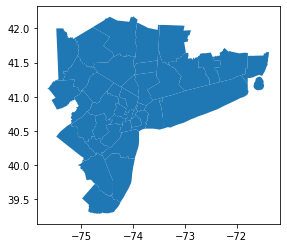

In [213]:
gdf_sorted.plot()

Let's make the map prettier

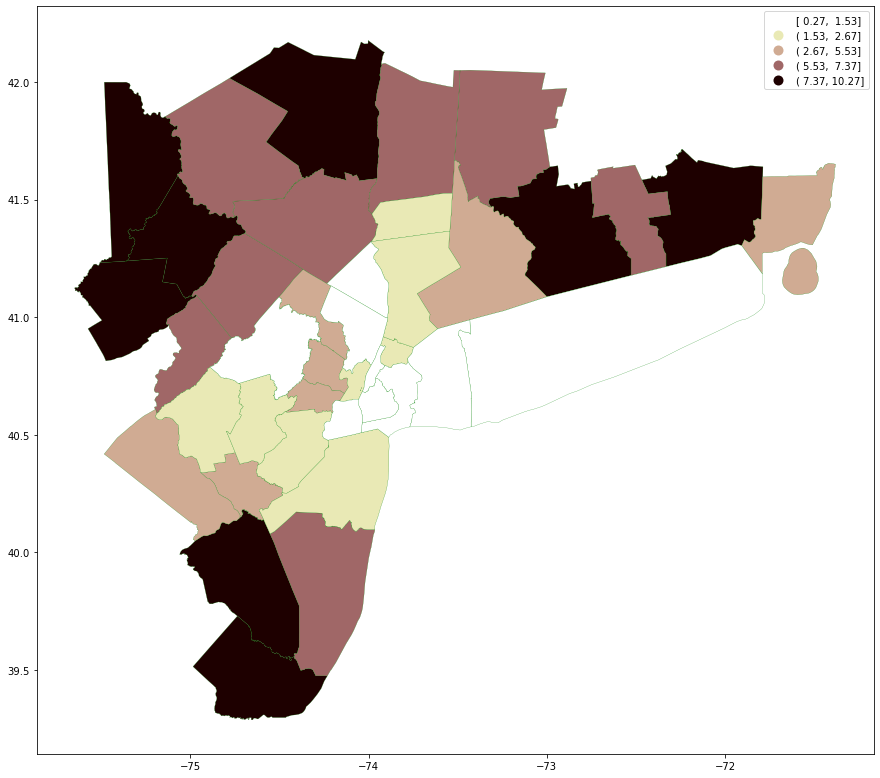

In [214]:
gdf_sorted.head(100).plot(figsize=(15,15),
                          column='Percent $1,500,000 to $1,999,999',
                          legend=True,
                          cmap='pink_r',
                          edgecolor='green', 
                          linewidth=0.2,
                           scheme='quantiles',
                         )

Here you can see that some counties have significant more owner occupied housing that are between 1.5 to 2 million dollars than others. 

### Using subplot to create multiple maps

I want to creat 4 maps that compare the percentage of houses in different value categories in the counties of New York metropolitan Region. 

Text(0.5, 1.0, '$1,500,000 to $1,999,999')

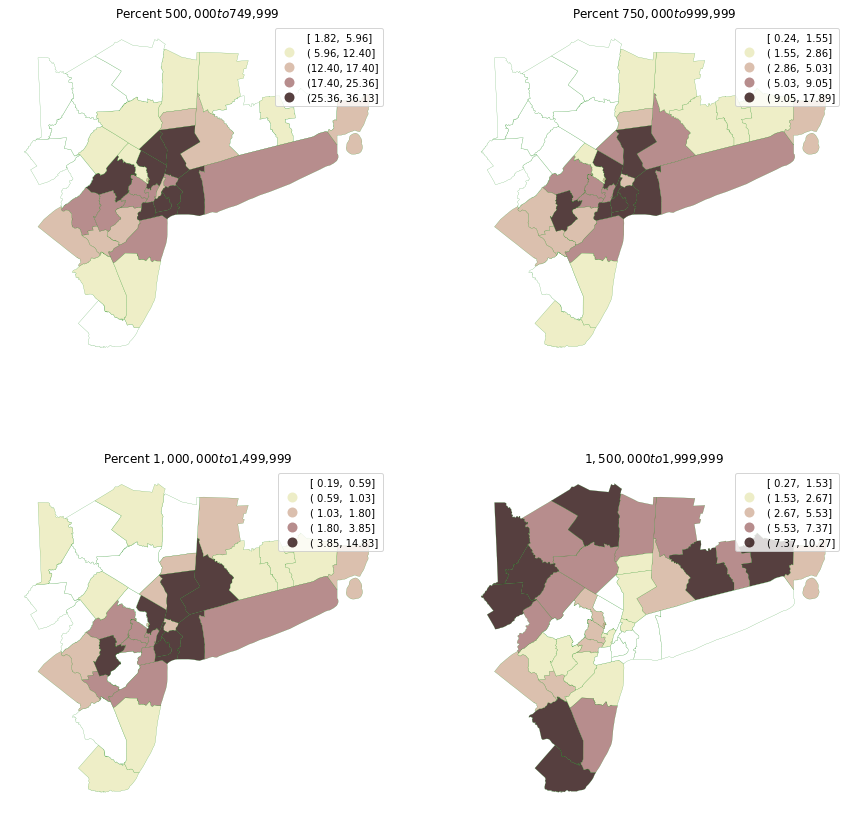

In [210]:
fig, axs = plt.subplots(2,2,figsize=(15, 15))

(ax1, ax2), (ax3, ax4) = axs
gdf.plot(column='Percent $500,000 to $749,999', 
            cmap='pink_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='green', 
            linewidth=0.2, 
            alpha=0.75, 
            ax=ax1,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percent $500,000 to $749,999")

# spatial lag map on the right
gdf.plot(column='Percent $750,000 to $999,999', 
            cmap='pink_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='green', 
            linewidth=0.2, 
            alpha=0.75, 
            ax=ax2, 
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent $750,000 to $999,999")

gdf.plot(column='Percent $1,000,000 to $1,499,999', 
            cmap='pink_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='green', 
            linewidth=0.2, 
            alpha=0.75, 
            ax=ax3, 
            legend=True
           )
ax3.axis("off")
ax3.set_title("Percent $1,000,000 to $1,499,999")

gdf.plot(column='Percent $1,500,000 to $1,999,999', 
            cmap='pink_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='green', 
            linewidth=0.2, 
            alpha=0.75, 
            ax=ax4, 
            legend=True
           )
ax4.axis("off")
ax4.set_title("$1,500,000 to $1,999,999")


## Filtering and Subsetting the data

I want to find which census tract has more than 5% of houses with value between $750,000 to $999,999 

In [222]:
gdf[gdf['Percent $750,000 to $999,999']>5]

,geoid,name,total,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999","$70,000 to $79,999","$80,000 to $89,999","$90,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $174,999","$175,000 to $199,999","$200,000 to $249,999","$250,000 to $299,999","$300,000 to $399,999","$400,000 to $499,999","$500,000 to $749,999","$750,000 to $999,999","$1,000,000 to $1,499,999","$1,500,000 to $1,999,999","$2,000,000 or more",geometry,"Percent Less than $10,000","Percent $10,000 to $14,999","Percent $15,000 to $19,999","Percent $20,000 to $24,999","Percent $25,000 to $29,999","Percent $30,000 to $34,999","Percent $35,000 to $39,999","Percent $40,000 to $49,999","Percent $50,000 to $59,999","Percent $60,000 to $69,999","Percent $70,000 to $79,999","Percent $80,000 to $89,999","Percent $90,000 to $99,999","Percent $100,000 to $124,999","Percent $125,000 to $149,999","Percent $150,000 to $174,999","Percent $175,000 to $199,999","Percent $200,000 to $249,999","Percent $250,000 to $299,999","Percent $300,000 to $399,999","Percent $400,000 to $499,999","Percent $500,000 to $749,999","Percent $750,000 to $999,999","Percent $1,000,000 to $1,499,999","Percent $1,500,000 to $1,999,999","Percent $2,000,000 or more"
0,05000US09001,"Fairfield County, CT",228111.0,1128.0,0.000037,281.0,455.0,423.0,525.0,211.0,623.0,818.0,913.0,601.0,1117.0,655.0,3556.0,3554.0,7663.0,6090.0,16575.0,18553.0,41872.0,28906.0,39343.0,19789.0,15282.0,6969.0,12019.0,"MULTIPOLYGON (((-73.54362 41.37509, -73.54347 ...",0.494496,1.600718e-08,0.123186,0.123186,0.185436,0.230151,0.092499,0.273113,0.358597,0.400244,0.263468,0.489674,0.287141,1.558890,1.558013,3.359329,2.669753,7.266199,8.133321,18.355976,12.671901,17.247305,8.675163,6.699370,2.669753,5.268926
6,05000US34003,"Bergen County, NJ",220190.0,985.0,0.000017,120.0,62.0,152.0,245.0,272.0,432.0,425.0,332.0,494.0,450.0,323.0,1549.0,1605.0,2543.0,2113.0,7861.0,12542.0,47494.0,43196.0,57512.0,22227.0,10343.0,3080.0,3750.0,"MULTIPOLYGON (((-74.24853 40.99209, -74.24860 ...",0.447341,7.774730e-09,0.054498,0.054498,0.069031,0.111268,0.123530,0.196194,0.193015,0.150779,0.224352,0.204369,0.146691,0.703483,0.728916,1.154912,0.959626,3.570099,5.695990,21.569554,19.617603,26.119261,10.094464,4.697307,0.959626,1.703075
8,05000US34013,"Essex County, NJ",125777.0,1517.0,0.000075,151.0,136.0,159.0,92.0,128.0,275.0,307.0,267.0,275.0,568.0,461.0,2709.0,2645.0,5442.0,4107.0,9709.0,12197.0,25132.0,19084.0,22501.0,9792.0,4837.0,1713.0,1454.0,"MULTIPOLYGON (((-74.32916 40.83856, -74.32899 ...",1.206103,5.980579e-08,0.120054,0.120054,0.126414,0.073145,0.101767,0.218641,0.244083,0.212280,0.218641,0.451593,0.366522,2.153812,2.102928,4.326705,3.265303,7.719217,9.697321,19.981396,15.172885,17.889598,7.785207,3.845695,3.265303,1.156014
9,05000US34017,"Hudson County, NJ",81934.0,921.0,0.000012,37.0,180.0,66.0,145.0,118.0,249.0,151.0,153.0,243.0,269.0,122.0,1403.0,809.0,2531.0,1549.0,7404.0,9234.0,19719.0,11888.0,14860.0,5197.0,2755.0,923.0,1000.0,"MULTIPOLYGON (((-74.09079 40.76198, -74.09027 ...",1.124075,1.454446e-08,0.045158,0.045158,0.080553,0.176972,0.144018,0.303903,0.184295,0.186736,0.296580,0.328313,0.148900,1.712354,0.987380,3.089072,1.890546,9.036542,11.270047,24.066932,14.509239,18.136549,6.342910,3.362462,1.890546,1.220495
10,05000US34019,"Hunterdon County, NJ",39081.0,212.0,0.000314,3.0,23.0,32.0,26.0,30.0,16.0,66.0,9.0,18.0,75.0,67.0,521.0,373.0,666.0,808.0,2539.0,3564.0,9257.0,7872.0,9909.0,1967.0,703.0,185.0,92.0,"MULTIPOLYGON (((-75.11001 40.63891, -75.10989 ...",0.542463,8.041633e-07,0.007676,0.007676,0.081881,0.066528,0.076764,0.040941,0.168880,0.023029,0.046058,0.191909,0.171439,1.333129,0.954428,1.704153,2.067501,6.496763,9.119521,23.686702,20.142780,25.355032,5.033136,1.798828,2.067501,0.235409
11,05000US34021,"Mercer County, NJ",81925.0,213.0,0.000130,123.

Create a new variable gdf_5 for later analysis

In [228]:
gdf_5 = gdf[gdf['Percent $750,000 to $999,999']>5]

In [230]:
print('There are ' + str(len(gdf_5)) + ' census tracts with more than 5% of houses with value between $750,000 to $999,999 ')

There are 18 census tracts with more than 5% of houses with value between $750,000 to $999,999 


Plot the census tract with more than 5% of houses with value between $750,000 to $999,999 

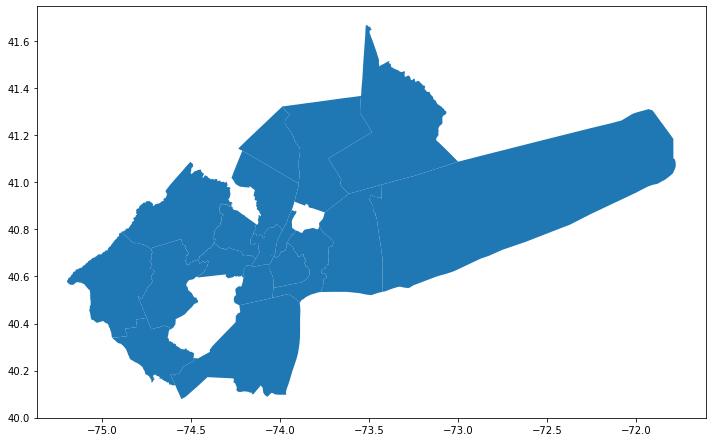

In [223]:
gdf[gdf['Percent $750,000 to $999,999']>5].plot(figsize=(12,10))

Add a base map

In [153]:
gdf_web_mercator = gdf.to_crs(epsg=3857)

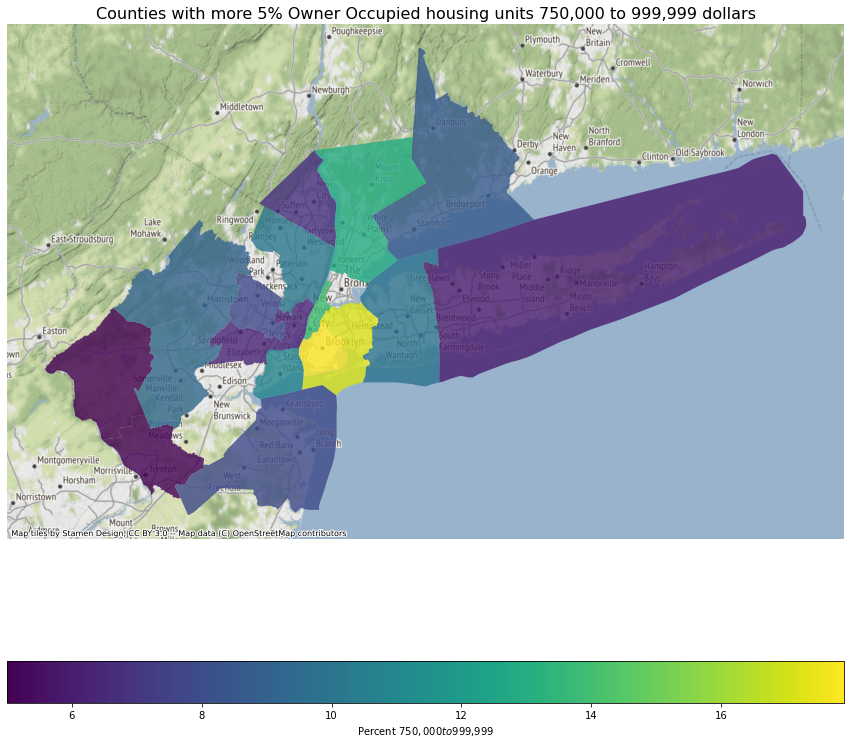

In [227]:
# use subplots that make it easier to create multiple layered maps
fig, ax = plt.subplots(figsize=(15, 15))

# add the layer with ax=ax in the argument 
gdf_web_mercator[gdf_web_mercator['Percent $750,000 to $999,999']>5].plot(ax=ax, alpha=0.8, 
                                                                          column='Percent $750,000 to $999,999', 
                                                                          legend=True,
                                                                          legend_kwds={'label': "Percent $750,000 to $999,999",
                                                                        'orientation': "horizontal"}
                                                                         )

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Counties with more 5% Owner Occupied housing units 750,000 to 999,999 dollars',fontsize=16)

# add a basemap
ctx.add_basemap(ax)